In [1]:
import os
import numpy as np

In [2]:
dataset_path = 'Dataset/train/'

In [3]:
num_non_glaucoma_images = len(os.listdir(os.path.join(dataset_path, '0')))
num_glaucoma_images = len(os.listdir(os.path.join(dataset_path, '1')))

In [4]:
print("Number of non glaucoma images:", num_non_glaucoma_images)
print("Number of glaucoma images:", num_glaucoma_images)

Number of non glaucoma images: 386
Number of glaucoma images: 134


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# !pip install seaborn

In [7]:
# !pip install matplotlib

In [8]:
labels = ['non_glaucoma', 'glaucoma']
counts = [num_non_glaucoma_images, num_glaucoma_images]

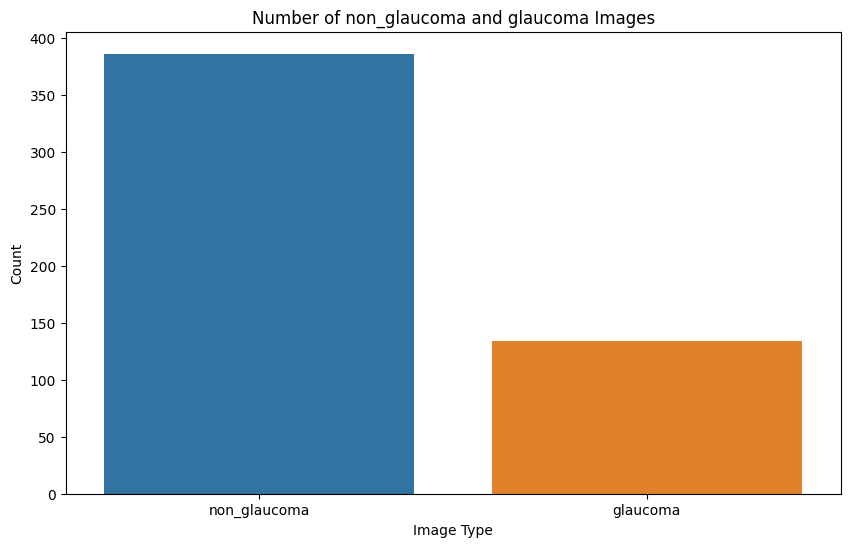

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Number of non_glaucoma and glaucoma Images')
plt.show()

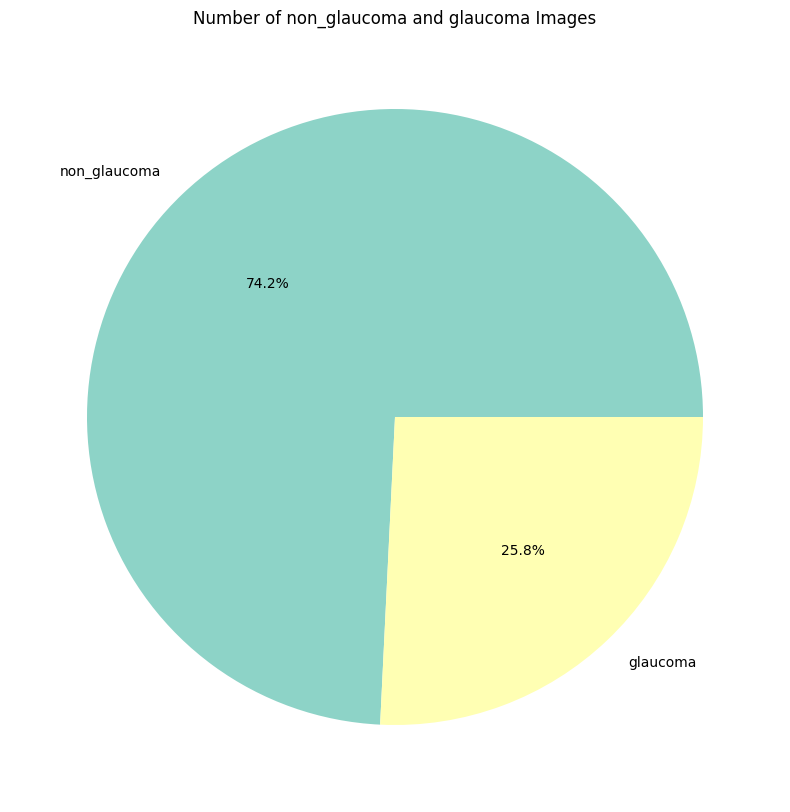

In [10]:
plt.figure(figsize=(10, 10))
sns.set_palette("Set3")
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Number of non_glaucoma and glaucoma Images')
plt.show()

In [11]:
non_glaucoma_path = os.path.join(dataset_path, '0')
glaucoma_path = os.path.join(dataset_path, '1')

In [12]:
import cv2

In [13]:
image_files = os.listdir(non_glaucoma_path)

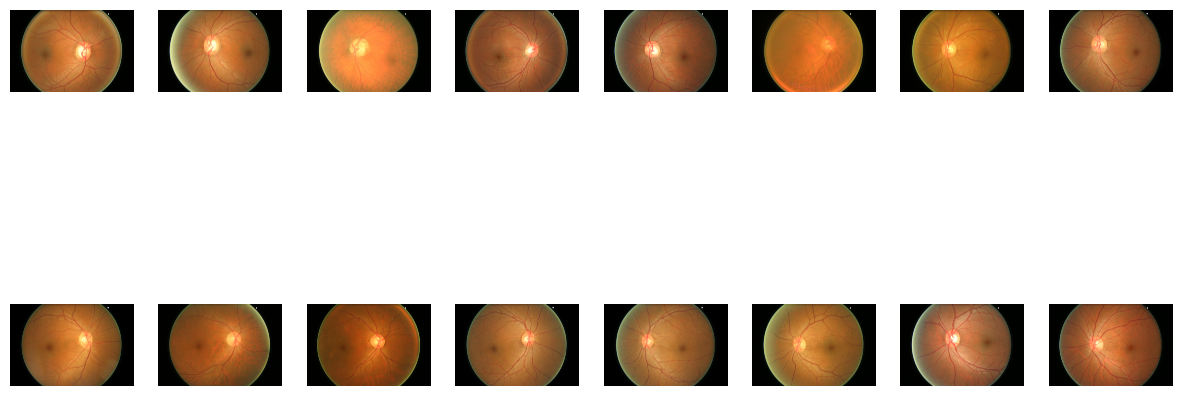

In [14]:
num_images_to_display = min(16, len(image_files))
fig, axes = plt.subplots(2, 8, figsize=(15, 7))
for i in range(num_images_to_display):
    image_file = image_files[i]
    image_path = os.path.join(non_glaucoma_path, image_file)
    if not os.path.isfile(image_path):
        print(f"Error: File not found - {image_path}")
        continue
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image not loaded - {image_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i // 8, i % 8].imshow(image)
    axes[i // 8, i % 8].axis('off')
plt.show()

In [15]:
image_files = os.listdir(glaucoma_path)

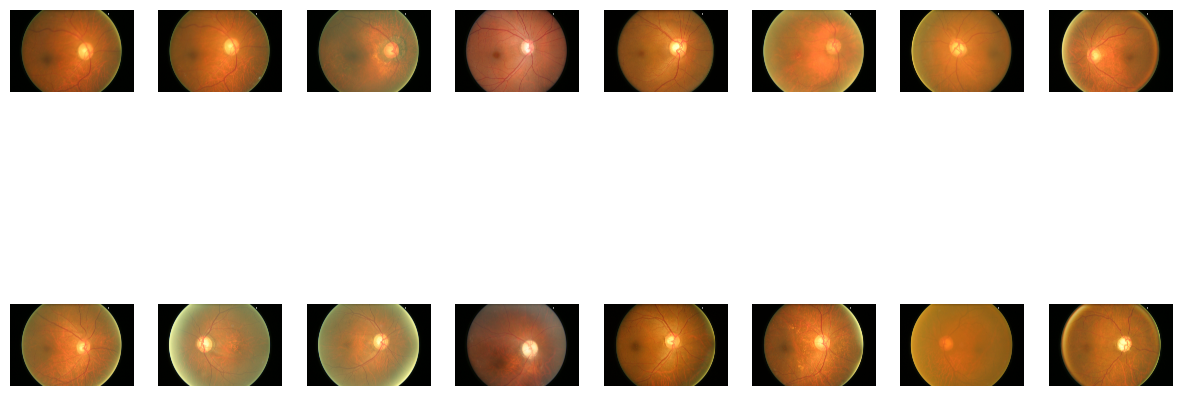

In [16]:
num_images_to_display = min(16, len(image_files))
fig, axes = plt.subplots(2, 8, figsize=(15, 7))
for i in range(num_images_to_display):
    image_file = image_files[i]
    image_path = os.path.join(glaucoma_path, image_file)
    if not os.path.isfile(image_path):
        print(f"Error: File not found - {image_path}")
        continue
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image not loaded - {image_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    axes[i // 8, i % 8].imshow(image)
    axes[i // 8, i % 8].axis('off')
plt.show()

In [17]:
def load_and_preprocess_images(image_folder):
    image_files = os.listdir(image_folder)
    images = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (128, 128))
            images.append(image)
    return images

In [18]:
non_glaucoma_files = load_and_preprocess_images(os.path.join(dataset_path, '0'))
glaucoma_path_files = load_and_preprocess_images(os.path.join(dataset_path,'1'))

In [19]:
non_glaucoma_files = np.array(non_glaucoma_files).reshape(-1, 128, 128, 3)
glaucoma_path_files = np.array(glaucoma_path_files).reshape(-1, 128, 128, 3)

In [20]:
all_files = np.concatenate((non_glaucoma_files, glaucoma_path_files), axis=0)

In [21]:
all_labels = np.concatenate((
np.zeros(len(non_glaucoma_files)),
np.ones(len(glaucoma_path_files)),
))

In [22]:
all_files_flat = all_files.reshape(-1, all_files.shape[1] * all_files.shape[2]* all_files.shape[3])

In [23]:
non_glaucoma_files_new = all_files_flat[all_labels == 0].reshape(-1, 128, 128,3)
glaucoma_path_files_new = all_files_flat[all_labels == 1].reshape(-1, 128, 128,3)
print("non_glaucoma_files shape:", non_glaucoma_files_new.shape)
print("glaucoma_path_files shape:", glaucoma_path_files_new.shape)

non_glaucoma_files shape: (386, 128, 128, 3)
glaucoma_path_files shape: (134, 128, 128, 3)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [25]:
non_glaucoma_files_new = non_glaucoma_files_new.astype('float32') / 255.0
glaucoma_path_files_new =glaucoma_path_files_new.astype('float32') / 255.0

In [26]:
X = np.concatenate((non_glaucoma_files_new, glaucoma_path_files_new))
y = np.concatenate(([0]*386, [1]*134))

In [27]:
image_shape = (128,128)

In [28]:
X_resized = np.array([cv2.resize(image, image_shape) for image in X])
X_flattened = X_resized.reshape(X_resized.shape[0], -1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, stratify = y, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.externals import joblib
    

In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
# dt_model.save('decision_tree_model.joblib')

In [33]:
y_pred_dt = dt_model.predict(X_test)

In [34]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.6538461538461539


In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score,classification_report, confusion_matrix

In [36]:
f1 = f1_score(y_test, y_pred_dt, average='weighted')
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
classification_rep = classification_report(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

In [37]:
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.6577501445922498
Precision: 0.6620866489832007
Recall: 0.6538461538461539
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        77
           1       0.34      0.37      0.36        27

    accuracy                           0.65       104
   macro avg       0.56      0.56      0.56       104
weighted avg       0.66      0.65      0.66       104

Confusion Matrix:
 [[58 19]
 [17 10]]


In [38]:
import scikitplot as skplt

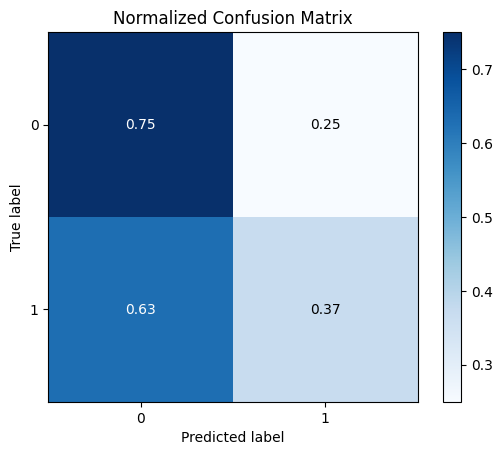

In [39]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=True)
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

C:\Users\Amol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# logreg_model.save('logistic_regression_model.joblib')

In [43]:
y_pred_lr = logreg_model.predict(X_test)

In [44]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

Accuracy: 0.7980769230769231


In [45]:
f1 = f1_score(y_test, y_pred_lr, average='weighted')
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
classification_rep = classification_report(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

In [46]:
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.7940672104216501
Precision: 0.7915865384615385
Recall: 0.7980769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.62      0.56      0.59        27

    accuracy                           0.80       104
   macro avg       0.74      0.72      0.73       104
weighted avg       0.79      0.80      0.79       104

Confusion Matrix:
 [[68  9]
 [12 15]]


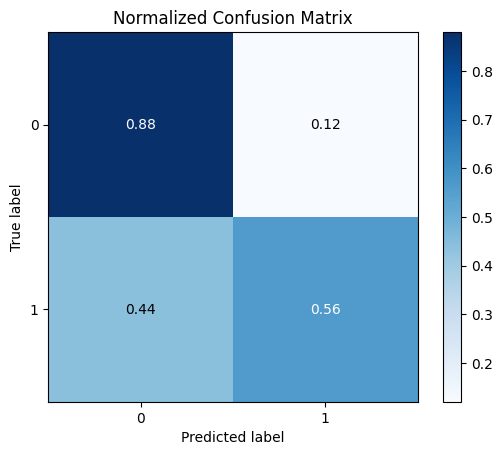

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True)
plt.show()

## Using CNN

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [49]:
# Define CNN model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
# Train the model
# Reshape the data to (number_of_samples, 128, 128, 3)
X_train = X_train.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


Epoch 1/10
13/13 [==============================] - 6s 369ms/step - loss: 0.6527 - accuracy: 0.7428 - val_loss: 0.5794 - val_accuracy: 0.7404
Epoch 2/10
13/13 [==============================] - 5s 399ms/step - loss: 0.5752 - accuracy: 0.7428 - val_loss: 0.5679 - val_accuracy: 0.7404
Epoch 3/10
13/13 [==============================] - 5s 421ms/step - loss: 0.5762 - accuracy: 0.7428 - val_loss: 0.5760 - val_accuracy: 0.7404
Epoch 4/10
13/13 [==============================] - 6s 428ms/step - loss: 0.5810 - accuracy: 0.7428 - val_loss: 0.5880 - val_accuracy: 0.7404
Epoch 5/10
13/13 [==============================] - 5s 413ms/step - loss: 0.5758 - accuracy: 0.7428 - val_loss: 0.5665 - val_accuracy: 0.7404
Epoch 6/10
13/13 [==============================] - 5s 413ms/step - loss: 0.5886 - accuracy: 0.7428 - val_loss: 0.5648 - val_accuracy: 0.7404
Epoch 7/10
13/13 [==============================] - 5s 381ms/step - loss: 0.5846 - accuracy: 0.7428 - val_loss: 0.5875 - val_accuracy: 0.7404
Epoch 

C:\Users\Amol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [51]:
accuracy = accuracy_score(y_test, y_pred)

model.save('glaucoma_detection_model.h5')
print(f'Accuracy: {accuracy}')


Accuracy: 0.7403846153846154


In [62]:
# # Load the saved models
# loaded_dt_model = DecisionTreeClassifier.load('decision_tree_model.joblib')
# loaded_logreg_model = LogisticRegression.load('logistic_regression_model.joblib')
# loaded_cnn_model = tf.keras.models.load_model('glaucoma_detection_model.h5')
from tensorflow.keras.preprocessing import image as keras_image
# Function to preprocess a single image
def preprocess_single_image(image_path):
    img = keras_image.load_img(image_path, target_size=(128, 128))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Example image path for prediction
image_path_to_predict = 'D:\Rudra 2023-24\Glaucoma Detection\final project\glucoma algo Final code\Dataset\Train\0\002.jpg'

# Preprocess the image
preprocessed_image = preprocess_single_image(image_path_to_predict)

# For Decision Tree
dt_prediction = loaded_dt_model.predict(preprocessed_image)
print("Decision Tree Prediction:", dt_prediction)

# For Logistic Regression
logreg_prediction = loaded_logreg_model.predict(preprocessed_image)
print("Logistic Regression Prediction:", logreg_prediction)

# For CNN
cnn_prediction = (loaded_cnn_model.predict(preprocessed_image) > 0.5).astype("int32")
print("CNN Prediction:", cnn_prediction)

ValueError: embedded null character

In [63]:
from joblib import load
from tensorflow.keras.preprocessing import image as keras_image

# Load the saved models
# loaded_dt_model = load('decision_tree_model.joblib')
# loaded_logreg_model = load('logistic_regression_model.joblib')
loaded_cnn_model = tf.keras.models.load_model('glaucoma_detection_model.h5')

# Function to preprocess a single image
def preprocess_single_image(image_path):
    img = keras_image.load_img(image_path, target_size=(128, 128))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Example image path for prediction
image_path_to_predict = 'D:/Rudra 2023-24/Glaucoma Detection/final project/glucoma algo Final code/Dataset/Train/1/097.jpg'

# Preprocess the image
preprocessed_image = preprocess_single_image(image_path_to_predict)

# For Decision Tree
# dt_prediction = loaded_dt_model.predict(preprocessed_image)
# print("Decision Tree Prediction:", dt_prediction)

# # For Logistic Regression
# logreg_prediction = loaded_logreg_model.predict(preprocessed_image)
# print("Logistic Regression Prediction:", logreg_prediction)

# For CNN
cnn_prediction = (loaded_cnn_model.predict(preprocessed_image) > 0.5).astype("int32")
print("CNN Prediction:", cnn_prediction)


CNN Prediction: [[0]]
